## Getting Started with FastF1

In [ ]:
import fastf1
session = fastf1.get_session(2019, 'Monza', 'Q')
session.load(telemetry=False, laps=False, weather=False)
vettel = session.get_driver('VET')
print(f"Pronto {vettel['FirstName']}?")

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /home/octopusprime/.cache/fastf1
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. Loading data...
_api           INFO 	Fetching race control messages...
req            INFO 	Data has been written to cache!
core           INFO 	Finished loading data for 20 drivers: ['16', '44', '77', '5', '3', '27', '55', '23', '18', '7', '99', '20', '26', '4', '10', '8', '11', '63', '88', '33']


Pronto Sebastian?


In [2]:
session

2019 Season Round 14: Italian Grand Prix - Qualifying

In [3]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

In [4]:
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')

session = fastf1.get_session(2019, 'Monza', 'Q')

session.load()

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Process

In [5]:
fast_leclerc = session.laps.pick_driver('LEC').pick_fastest()
fast_leclerc

/home/octopusprime/miniconda3/envs/f1_env/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Time                      0 days 01:11:14.868000
Driver                                       LEC
DriverNumber                                  16
LapTime                   0 days 00:01:19.307000
LapNumber                                   14.0
Stint                                        5.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:26.469000
Sector2Time               0 days 00:00:26.412000
Sector3Time               0 days 00:00:26.426000
Sector1SessionTime        0 days 01:10:22.030000
Sector2SessionTime        0 days 01:10:48.442000
Sector3SessionTime        0 days 01:11:14.868000
SpeedI1                                    329.0
SpeedI2                                    347.0
SpeedFL                                    321.0
SpeedST                                    349.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [6]:
lec_car_data = fast_leclerc.get_car_data()
lec_car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2019-09-07 13:54:56.702,11723,326,8,100,False,8,car,0 days 00:00:00.048000,0 days 01:09:55.609000
1,2019-09-07 13:54:56.942,11762,325,8,100,False,8,car,0 days 00:00:00.288000,0 days 01:09:55.849000
2,2019-09-07 13:54:57.181,11736,327,8,100,False,8,car,0 days 00:00:00.527000,0 days 01:09:56.088000
3,2019-09-07 13:54:57.382,11809,329,8,100,False,8,car,0 days 00:00:00.728000,0 days 01:09:56.289000
4,2019-09-07 13:54:57.622,11852,330,8,100,False,14,car,0 days 00:00:00.968000,0 days 01:09:56.529000
...,...,...,...,...,...,...,...,...,...,...
326,2019-09-07 13:56:14.863,11504,320,8,100,False,8,car,0 days 00:01:18.209000,0 days 01:11:13.770000
327,2019-09-07 13:56:15.103,11553,320,8,100,False,8,car,0 days 00:01:18.449000,0 days 01:11:14.010000
328,2019-09-07 13:56:15.343,11611,321,8,100,False,8,car,0 days 00:01:18.689000,0 days 01:11:14.250000
329,2019-09-07 13:56:15.582,11637,323,8,100,False,8,car,0 days 00:01:18.928000,0 days 01:11:14.489000


In [8]:
t = lec_car_data['Time']
t

0     0 days 00:00:00.048000
1     0 days 00:00:00.288000
2     0 days 00:00:00.527000
3     0 days 00:00:00.728000
4     0 days 00:00:00.968000
               ...          
326   0 days 00:01:18.209000
327   0 days 00:01:18.449000
328   0 days 00:01:18.689000
329   0 days 00:01:18.928000
330   0 days 00:01:19.168000
Name: Time, Length: 331, dtype: timedelta64[ns]

In [10]:
vCar = lec_car_data['Speed']
vCar

0      326
1      325
2      327
3      329
4      330
      ... 
326    320
327    320
328    321
329    323
330    325
Name: Speed, Length: 331, dtype: int64

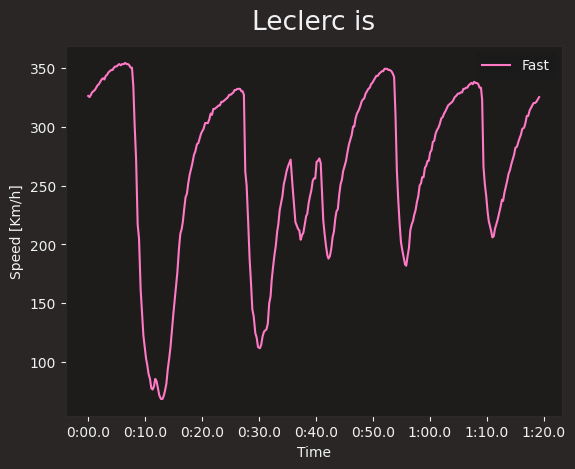

In [11]:
fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

## Getting started with the basics

In [12]:
import fastf1
session = fastf1.get_session(2021, 7, 'Q')
# Loading the Qualifying of the 7th race of the 2021 season

In [13]:
session.name

'Qualifying'

In [14]:
session.date

Timestamp('2021-06-19 13:00:00')

In [ ]:
session.event
# The event object holds information about the event

RoundNumber                                                     7
Country                                                    France
Location                                             Le Castellet
OfficialEventName    FORMULA 1 EMIRATES GRAND PRIX DE FRANCE 2021
EventDate                                     2021-06-20 00:00:00
EventName                                       French Grand Prix
EventFormat                                          conventional
Session1                                               Practice 1
Session1Date                            2021-06-18 11:30:00+02:00
Session1DateUtc                               2021-06-18 09:30:00
Session2                                               Practice 2
Session2Date                            2021-06-18 15:00:00+02:00
Session2DateUtc                               2021-06-18 13:00:00
Session3                                               Practice 3
Session3Date                            2021-06-19 12:00:00+02:00
Session3Da

In [18]:
session.event['EventName']

'French Grand Prix'

In [19]:
session.event['EventDate']

Timestamp('2021-06-20 00:00:00')

In [20]:
event = fastf1.get_event(2021, 7)
event
# loading in an event directly using get_event

RoundNumber                                                     7
Country                                                    France
Location                                             Le Castellet
OfficialEventName    FORMULA 1 EMIRATES GRAND PRIX DE FRANCE 2021
EventDate                                     2021-06-20 00:00:00
EventName                                       French Grand Prix
EventFormat                                          conventional
Session1                                               Practice 1
Session1Date                            2021-06-18 11:30:00+02:00
Session1DateUtc                               2021-06-18 09:30:00
Session2                                               Practice 2
Session2Date                            2021-06-18 15:00:00+02:00
Session2DateUtc                               2021-06-18 13:00:00
Session3                                               Practice 3
Session3Date                            2021-06-19 12:00:00+02:00
Session3Da

In [21]:
session = event.get_race()
session.name
# method for accessing a session in an event

'Race'

In [22]:
event = fastf1.get_event(2021, 'French Grand Prix')
event['EventName']
# loading an event by name

'French Grand Prix'

In [23]:
event = fastf1.get_event(2021, 'Spain')
event['EventName']
# even if you do not enter the exact name, FastF1 returns the best match

'Spanish Grand Prix'

In [24]:
session = fastf1.get_session(2021, 'Silverstone', 'Q')
session.event['EventName']
# events and sessions can also be loaded by their country or location

'British Grand Prix'

In [25]:
schedule = fastf1.get_event_schedule(2021)
schedule
# We can load the full event schedule for a season

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Bahrain,FORMULA 1 ARAMCO PRE-SEASON TESTING 2021,2021-03-14,Pre-Season Test,testing,Practice 1,2021-03-12 10:00:00+03:00,2021-03-12 07:00:00,...,Practice 3,2021-03-14 10:00:00+03:00,2021-03-14 07:00:00,None,NaT,NaT,None,NaT,NaT,False
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2021,2021-03-28,Bahrain Grand Prix,conventional,Practice 1,2021-03-26 14:30:00+03:00,2021-03-26 11:30:00,...,Practice 3,2021-03-27 15:00:00+03:00,2021-03-27 12:00:00,Qualifying,2021-03-27 18:00:00+03:00,2021-03-27 15:00:00,Race,2021-03-28 18:00:00+03:00,2021-03-28 15:00:00,True
2,2,Italy,Imola,FORMULA 1 PIRELLI GRAN PREMIO DEL MADE IN ITAL...,2021-04-18,Emilia Romagna Grand Prix,conventional,Practice 1,2021-04-16 11:00:00+02:00,2021-04-16 09:00:00,...,Practice 3,2021-04-17 11:00:00+02:00,2021-04-17 09:00:00,Qualifying,2021-04-17 14:00:00+02:00,2021-04-17 12:00:00,Race,2021-04-18 15:00:00+02:00,2021-04-18 13:00:00,True
3,3,Portugal,Portimão,FORMULA 1 HEINEKEN GRANDE PRÉMIO DE PORTUGAL 2021,2021-05-02,Portuguese Grand Prix,conventional,Practice 1,2021-04-30 11:30:00+01:00,2021-04-30 10:30:00,...,Practice 3,2021-05-01 12:00:00+01:00,2021-05-01 11:00:00,Qualifying,2021-05-01 15:00:00+01:00,2021-05-01 14:00:00,Race,2021-05-02 15:00:00+01:00,2021-05-02 14:00:00,True
4,4,Spain,Barcelona,FORMULA 1 ARAMCO GRAN PREMIO DE ESPAÑA 2021,2021-05-09,Spanish Grand Prix,conventional,Practice 1,2021-05-07 11:30:00+02:00,2021-05-07 09:30:00,...,Practice 3,2021-05-08 12:00:00+02:00,2021-05-08 10:00:00,Qualifying,2021-05-08 15:00:00+02:00,2021-05-08 13:00:00,Race,2021-05-09 15:00:00+02:00,2021-05-09 13:00:00,True
5,5,Monaco,Monte Carlo,FORMULA 1 GRAND PRIX DE MONACO 2021,2021-05-23,Monaco Grand Prix,conventional,Practice 1,2021-05-20 11:30:00+02:00,2021-05-20 09:30:00,...,Practice 3,2021-05-22 12:00:00+02:00,2021-05-22 10:00:00,Qualifying,2021-05-22 15:00:00+02:00,2021-05-22 13:00:00,Race,2021-05-23 15:00:00+02:00,2021-05-23 13:00:00,True
6,6,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2021,2021-06-06,Azerbaijan Grand Prix,conventional,Practice 1,2021-06-04 12:30:00+04:00,2021-06-04 08:30:00,...,Practice 3,2021-06-05 13:00:00+04:00,2021-06-05 09:00:00,Qualifying,2021-06-05 16:00:00+04:00,2021-06-05 12:00:00,Race,2021-06-06 16:00:00+04:00,2021-06-06 12:00:00,True
7,7,France,Le Castellet,FORMULA 1 EMIRATES GRAND PRIX DE FRANCE 2021,2021-06-20,French Grand Prix,conventional,Practice 1,2021-06-18 11:30:00+02:00,2021-06-18 09:30:00,...,Practice 3,2021-06-19 12:00:00+02:00,2021-06-19 10:00:00,Qualifying,2021-06-19 15:00:00+02:00,2021-06-19 13:00:00,Race,2021-06-20 15:00:00+02:00,2021-06-20 13:00:00,True
8,8,Austria,Spielberg,FORMULA 1 BWT GROSSER PREIS DER STEIERMARK 2021,2021-06-27,Styrian Grand Prix,conventional,Practice 1,2021-06-25 11:30:00+02:00,2021-06-25 09:30:00,...,Practice 3,2021-06-26 12:00:00+02:00,2021-06-26 10:00:00,Qualifying,2021-06-26 15:00:00+02:00,2021-06-26 13:00:00,Race,2021-06-27 15:00:00+02:00,2021-06-27 13:00:00,True
9,9,Austria,Spielberg,FORMULA 1 BWT GROSSER PREIS VON ÖSTERREICH 2021,2021-07-04,Austrian Grand Prix,conventional,Practice 1,2021-07-02 11:30:00+02:00,2021-07-02 09:30:00,...,Practice 3,2021-07-03 12:00:00+02:00,2021-07-03 10:00:00,Qualifying,2021-07-03 15:00:00+02:00,2021-07-03 13:00:00,Race,2021-07-04 15:00:00+02:00,2021-07-04 13:00:00,True


In [ ]:
schedule.columns

Index(['RoundNumber', 'Country', 'Location', 'OfficialEventName', 'EventDate',
       'EventName', 'EventFormat', 'Session1', 'Session1Date',
       'Session1DateUtc', 'Session2', 'Session2Date', 'Session2DateUtc',
       'Session3', 'Session3Date', 'Session3DateUtc', 'Session4',
       'Session4Date', 'Session4DateUtc', 'Session5', 'Session5Date',
       'Session5DateUtc', 'F1ApiSupport'],
      dtype='object')

In [27]:
gp_12 = schedule.get_event_by_round(12)
gp_12['Country']
# method for selecting event by round

'Belgium'

In [28]:
gp_austin = schedule.get_event_by_name('Austin')
gp_austin['Country']
# method for selecting event by name

'United States'

In [29]:
session = fastf1.get_session(2021, 'French Grand Prix', 'Q')
session.load()
session.results
# .load() loads data from various APIs

core           INFO 	Loading data for French Grand Prix - Qualifying [v3.4.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
33,33,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,0600EF,red_bull,Max,Verstappen,Max Verstappen,...,,1.0,,NaN,0 days 00:01:31.001000,0 days 00:01:31.080000,0 days 00:01:29.990000,NaT,,NaN
44,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,...,,2.0,,NaN,0 days 00:01:31.237000,0 days 00:01:30.788000,0 days 00:01:30.248000,NaT,,NaN
77,77,V BOTTAS,BOT,bottas,Mercedes,00D2BE,mercedes,Valtteri,Bottas,Valtteri Bottas,...,,3.0,,NaN,0 days 00:01:31.669000,0 days 00:01:30.735000,0 days 00:01:30.376000,NaT,,NaN
11,11,S PEREZ,PER,perez,Red Bull Racing,0600EF,red_bull,Sergio,Perez,Sergio Perez,...,,4.0,,NaN,0 days 00:01:31.560000,0 days 00:01:30.971000,0 days 00:01:30.445000,NaT,,NaN
55,55,C SAINZ,SAI,sainz,Ferrari,DC0004,ferrari,Carlos,Sainz,Carlos Sainz,...,,5.0,,NaN,0 days 00:01:32.079000,0 days 00:01:31.146000,0 days 00:01:30.840000,NaT,,NaN
10,10,P GASLY,GAS,gasly,AlphaTauri,2B4562,alphatauri,Pierre,Gasly,Pierre Gasly,...,,6.0,,NaN,0 days 00:01:31.898000,0 days 00:01:31.353000,0 days 00:01:30.868000,NaT,,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,DC0004,ferrari,Charles,Leclerc,Charles Leclerc,...,,7.0,,NaN,0 days 00:01:32.209000,0 days 00:01:31.567000,0 days 00:01:30.987000,NaT,,NaN
4,4,L NORRIS,NOR,norris,McLaren,FF9800,mclaren,Lando,Norris,Lando Norris,...,,8.0,,NaN,0 days 00:01:31.733000,0 days 00:01:31.542000,0 days 00:01:31.252000,NaT,,NaN
14,14,F ALONSO,ALO,alonso,Alpine,0090FF,alpine,Fernando,Alonso,Fernando Alonso,...,,9.0,,NaN,0 days 00:01:32.158000,0 days 00:01:31.549000,0 days 00:01:31.340000,NaT,,NaN
3,3,D RICCIARDO,RIC,ricciardo,McLaren,FF9800,mclaren,Daniel,Ricciardo,Daniel Ricciardo,...,,10.0,,NaN,0 days 00:01:32.181000,0 days 00:01:31.615000,0 days 00:01:31.382000,NaT,,NaN


In [30]:
session.results.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points'],
      dtype='object')

In [31]:
session.results.iloc[0:10].loc[:, ['Abbreviation', 'Q3']]
# displaying the top 10 drivers and their Q3 times

,Abbreviation,Q3
33,VER,0 days 00:01:29.990000
44,HAM,0 days 00:01:30.248000
77,BOT,0 days 00:01:30.376000
11,PER,0 days 00:01:30.445000
55,SAI,0 days 00:01:30.840000
10,GAS,0 days 00:01:30.868000
16,LEC,0 days 00:01:30.987000
4,NOR,0 days 00:01:31.252000
14,ALO,0 days 00:01:31.340000
3,RIC,0 days 00:01:31.382000


In [32]:
session = fastf1.get_session(2021, 'French Grand Prix', 'Q')
session.load()
session.laps
# We can access all individual laps of a session

core           INFO 	Loading data for French Grand Prix - Qualifying [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '77', '11', '55', '10', '16', '4', '14', '3', '31', '5', '99', '63', '47', '6', '7', '9', '18', '22']


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:17:35.479000,GAS,10,NaT,1.0,1.0,0 days 00:14:47.810000,NaT,0 days 00:00:48.895000,0 days 00:00:46.957000,...,True,AlphaTauri,0 days 00:14:47.810000,2021-06-19 13:00:15.013,1,NaN,False,,False,False
1,0 days 00:27:42.702000,GAS,10,NaT,2.0,1.0,NaT,0 days 00:19:40.614000,0 days 00:00:23.040000,NaT,...,True,AlphaTauri,0 days 00:17:35.479000,2021-06-19 13:03:02.682,125,NaN,False,,False,False
2,0 days 00:30:15.038000,GAS,10,NaT,3.0,2.0,0 days 00:27:42.702000,NaT,0 days 00:00:43.813000,0 days 00:00:40.047000,...,False,AlphaTauri,0 days 00:27:42.702000,2021-06-19 13:13:09.905,1,NaN,False,,False,False
3,0 days 00:31:46.936000,GAS,10,0 days 00:01:31.898000,4.0,2.0,NaT,NaT,0 days 00:00:22.843000,0 days 00:00:27.881000,...,False,AlphaTauri,0 days 00:30:15.038000,2021-06-19 13:15:42.241,1,NaN,False,,False,True
4,0 days 00:34:20.695000,GAS,10,NaT,5.0,2.0,NaT,NaT,0 days 00:00:37.442000,0 days 00:00:47.382000,...,False,AlphaTauri,0 days 00:31:46.936000,2021-06-19 13:17:14.139,1,NaN,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0 days 00:54:22.881000,GIO,99,0 days 00:01:32.182000,9.0,4.0,NaT,NaT,0 days 00:00:23.146000,0 days 00:00:27.947000,...,True,Alfa Romeo Racing,0 days 00:52:50.699000,2021-06-19 13:38:17.902,1,NaN,False,,False,True
266,0 days 01:00:32.369000,GIO,99,NaT,10.0,4.0,NaT,0 days 00:56:04.344000,0 days 00:00:26.297000,0 days 00:00:33.082000,...,True,Alfa Romeo Racing,0 days 00:54:22.881000,2021-06-19 13:39:50.084,1,NaN,False,,False,False
267,0 days 01:03:24.940000,GIO,99,NaT,11.0,5.0,0 days 01:00:32.260000,NaT,0 days 00:00:49.673000,0 days 00:00:41.499000,...,True,Alfa Romeo Racing,0 days 01:00:32.369000,2021-06-19 13:45:59.572,1,NaN,False,,False,False
268,0 days 01:04:56.753000,GIO,99,0 days 00:01:31.813000,12.0,5.0,NaT,NaT,0 days 00:00:22.846000,0 days 00:00:27.868000,...,True,Alfa Romeo Racing,0 days 01:03:24.940000,2021-06-19 13:48:52.143,1,NaN,False,,False,True


In [33]:
session.laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [34]:
fastest_lap = session.laps.pick_fastest()
fastest_lap
# selecting the fastest lap of the session

Time                      0 days 01:25:25.050000
Driver                                       VER
DriverNumber                                  33
LapTime                   0 days 00:01:29.990000
LapNumber                                   15.0
Stint                                        6.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:22.405000
Sector2Time               0 days 00:00:27.388000
Sector3Time               0 days 00:00:40.197000
Sector1SessionTime        0 days 01:24:17.465000
Sector2SessionTime        0 days 01:24:44.853000
Sector3SessionTime        0 days 01:25:25.050000
SpeedI1                                    126.0
SpeedI2                                    284.0
SpeedFL                                    303.0
SpeedST                                    328.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [37]:
fastest_lap['LapTime']
# lap time of the fastest lap in qualifying

Timedelta('0 days 00:01:29.990000')

In [36]:
fastest_lap['Driver']
# driver of the fastest lap in qualifying

'VER'

Example

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta

import fastf1
import fastf1.plotting
from fastf1.core import Laps


# Enable Matplotlib patches for plotting timedelta values
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme=None)


session = fastf1.get_session(2021, 'Spanish Grand Prix', 'Q')
session.load()

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.4.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 

In [ ]:
drivers = pd.unique(session.laps['Driver'])
drivers
# get an array of all drivers in session

array(['HAM', 'VER', 'BOT', 'LEC', 'OCO', 'SAI', 'RIC', 'PER', 'NOR',
       'ALO', 'STR', 'GAS', 'VET', 'GIO', 'RUS', 'TSU', 'RAI', 'MSC',
       'LAT', 'MAZ'], dtype=object)

In [41]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps) \
    .sort_values(by='LapTime') \
    .reset_index(drop=True)

fastest_laps
# takes the fastest lap for each driver

/home/octopusprime/miniconda3/envs/f1_env/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/octopusprime/miniconda3/envs/f1_env/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/octopusprime/miniconda3/envs/f1_env/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/octopusprime/miniconda3/envs/f1_env/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  war

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:18:02.424000,HAM,44,0 days 00:01:16.741000,15.0,5.0,NaT,NaT,0 days 00:00:21.798000,0 days 00:00:28.543000,...,True,Mercedes,0 days 01:16:45.683000,2021-05-08 14:01:45.692,1,NaN,False,,False,True
1,0 days 01:18:07.649000,VER,33,0 days 00:01:16.777000,10.0,3.0,NaT,NaT,0 days 00:00:21.759000,0 days 00:00:28.723000,...,True,Red Bull Racing,0 days 01:16:50.872000,2021-05-08 14:01:50.881,1,NaN,False,,False,True
2,0 days 01:18:14.348000,BOT,77,0 days 00:01:16.873000,12.0,4.0,NaT,NaT,0 days 00:00:21.832000,0 days 00:00:28.612000,...,True,Mercedes,0 days 01:16:57.475000,2021-05-08 14:01:57.484,1,NaN,False,,False,True
3,0 days 01:26:06.880000,LEC,16,0 days 00:01:17.510000,17.0,6.0,NaT,NaT,0 days 00:00:21.880000,0 days 00:00:28.822000,...,True,Ferrari,0 days 01:24:49.370000,2021-05-08 14:09:49.379,1,NaN,False,,False,True
4,0 days 01:17:36.938000,OCO,31,0 days 00:01:17.580000,11.0,4.0,NaT,NaT,0 days 00:00:21.861000,0 days 00:00:29.087000,...,True,Alpine,0 days 01:16:19.358000,2021-05-08 14:01:19.367,1,NaN,False,,False,True
5,0 days 01:17:21.951000,SAI,55,0 days 00:01:17.620000,11.0,4.0,NaT,NaT,0 days 00:00:21.942000,0 days 00:00:28.908000,...,True,Ferrari,0 days 01:16:04.331000,2021-05-08 14:01:04.340,1,NaN,False,,False,True
6,0 days 01:17:30.933000,RIC,3,0 days 00:01:17.622000,11.0,4.0,NaT,NaT,0 days 00:00:21.773000,0 days 00:00:29.067000,...,True,McLaren,0 days 01:16:13.311000,2021-05-08 14:01:13.320,1,NaN,False,,False,True
7,0 days 01:05:00.127000,PER,11,0 days 00:01:17.669000,11.0,3.0,NaT,NaT,0 days 00:00:21.883000,0 days 00:00:29.082000,...,True,Red Bull Racing,0 days 01:03:42.458000,2021-05-08 13:48:42.467,1,NaN,False,,False,True
8,0 days 00:55:21.601000,NOR,4,0 days 00:01:17.696000,8.0,3.0,NaT,NaT,0 days 00:00:21.830000,0 days 00:00:29.021000,...,True,McLaren,0 days 00:54:03.905000,2021-05-08 13:39:03.914,1,NaN,False,,False,True
9,0 days 00:57:35.170000,ALO,14,0 days 00:01:17.966000,8.0,3.0,NaT,NaT,0 days 00:00:21.928000,0 days 00:00:29.124000,...,True,Alpine,0 days 00:56:17.204000,2021-05-08 13:41:17.213,1,NaN,False,,False,True


In [42]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']
fastest_laps['LapTimeDelta']
# aquiring the difference from pole

0           0 days 00:00:00
1    0 days 00:00:00.036000
2    0 days 00:00:00.132000
3    0 days 00:00:00.769000
4    0 days 00:00:00.839000
5    0 days 00:00:00.879000
6    0 days 00:00:00.881000
7    0 days 00:00:00.928000
8    0 days 00:00:00.955000
9    0 days 00:00:01.225000
10   0 days 00:00:01.233000
11   0 days 00:00:01.241000
12   0 days 00:00:01.338000
13   0 days 00:00:01.615000
14   0 days 00:00:01.704000
15   0 days 00:00:01.815000
16   0 days 00:00:02.176000
17   0 days 00:00:02.376000
18   0 days 00:00:02.478000
19   0 days 00:00:03.066000
Name: LapTimeDelta, dtype: timedelta64[ns]

In [43]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     HAM 0 days 00:01:16.741000        0 days 00:00:00
1     VER 0 days 00:01:16.777000 0 days 00:00:00.036000
2     BOT 0 days 00:01:16.873000 0 days 00:00:00.132000
3     LEC 0 days 00:01:17.510000 0 days 00:00:00.769000
4     OCO 0 days 00:01:17.580000 0 days 00:00:00.839000
5     SAI 0 days 00:01:17.620000 0 days 00:00:00.879000
6     RIC 0 days 00:01:17.622000 0 days 00:00:00.881000
7     PER 0 days 00:01:17.669000 0 days 00:00:00.928000
8     NOR 0 days 00:01:17.696000 0 days 00:00:00.955000
9     ALO 0 days 00:01:17.966000 0 days 00:00:01.225000
10    STR 0 days 00:01:17.974000 0 days 00:00:01.233000
11    GAS 0 days 00:01:17.982000 0 days 00:00:01.241000
12    VET 0 days 00:01:18.079000 0 days 00:00:01.338000
13    GIO 0 days 00:01:18.356000 0 days 00:00:01.615000
14    RUS 0 days 00:01:18.445000 0 days 00:00:01.704000
15    TSU 0 days 00:01:18.556000 0 days 00:00:01.815000
16    RAI 0 days 00:01:18.917000 0 days 00:00:02

In [44]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.get_team_color(lap['Team'], session=session)
    team_colors.append(color)

# creating a list of team colors

req            INFO 	Using cached data for driver_info


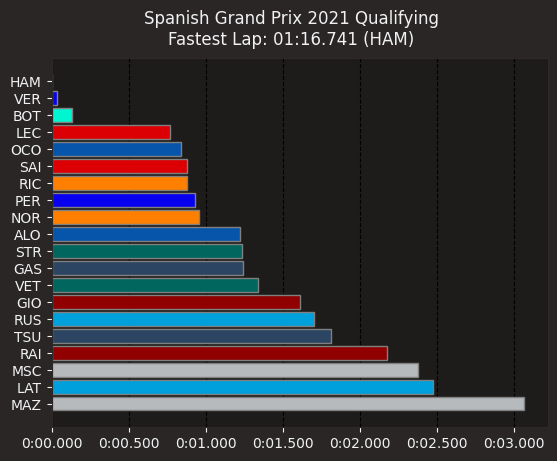

In [ ]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

# adding a title to the plot
lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

# plot time

## Josh's Get Data function

In [23]:
import pandas as pd
from selection import get_data_in_window
pd.read_feather("../../data/clean_model_data.feather")

,circuitId,alt,raceId,year,round,event_name,tempmax,tempmin,temp,dew,...,chastech_reg,sporting_reg,pitstop_reg,years_since_major_cycle,is_major_reg,cycle,quali_position,q1,q2,q3
0,1,10.0,338,2010,2,Australian Grand Prix,26.5,17.2,21.2,13.1,...,0.0,7,0,1,0,2,4.0,1:24.897,1:24.531,1:24.675
1,1,10.0,338,2010,2,Australian Grand Prix,26.5,17.2,21.2,13.1,...,0.0,7,0,1,0,2,9.0,1:25.588,1:25.122,1:25.372
2,1,10.0,338,2010,2,Australian Grand Prix,26.5,17.2,21.2,13.1,...,0.0,7,0,1,0,2,5.0,1:25.548,1:25.010,1:24.837
3,1,10.0,338,2010,2,Australian Grand Prix,26.5,17.2,21.2,13.1,...,0.0,7,0,1,0,2,3.0,1:25.082,1:24.335,1:24.111
4,1,10.0,338,2010,2,Australian Grand Prix,26.5,17.2,21.2,13.1,...,0.0,7,0,1,0,2,6.0,1:24.788,1:24.788,1:24.884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5752,79,13.0,1102,2023,5,Miami Grand Prix,27.9,23.4,25.3,19.0,...,0.0,2,0,1,0,4,14.0,1:28.180,1:28.091,\N
5753,79,13.0,1102,2023,5,Miami Grand Prix,27.9,23.4,25.3,19.0,...,0.0,2,0,1,0,4,16.0,1:28.394,\N,\N
5754,79,13.0,1102,2023,5,Miami Grand Prix,27.9,23.4,25.3,19.0,...,0.0,2,0,1,0,4,15.0,1:28.325,1:28.395,\N
5755,79,13.0,1102,2023,5,Miami Grand Prix,27.9,23.4,25.3,19.0,...,0.0,2,0,1,0,4,19.0,1:28.484,\N,\N


In [24]:
x = get_data_in_window(k=6, yr=2011, r_val=4).sort_values('round')

In [25]:
x['prev_con']

KeyError: 'prev_con'

In [ ]:
x.loc[x['round']==9,'prev_construct_points'] = x.loc[x['round']==9,'prev_construct_points']/x.loc[x['round']==9,'prev_construct_points'].sum()

In [ ]:
x.loc[x['round']==10]['prev_construct_points']

1931    228.0
1930    188.0
1929    304.0
1928    228.0
1935     15.0
1934    304.0
1933     65.0
1932     57.0
1939      3.0
1938     16.0
1937     15.0
1936     16.0
1944     51.0
1945    188.0
1946     51.0
1947      3.0
1940     65.0
1941     27.0
1942     57.0
1943     27.0
Name: prev_construct_points, dtype: float64

In [ ]:
x.loc[x['round']==9]['prev_construct_points']

1610    0.163732
1611    0.116784
1612    0.094484
1613    0.094484
1618    0.027582
1619    0.008803
1620    0.038146
1621    0.008803
1614    0.116784
1615    0.027582
1616    0.024061
1617    0.024061
1625    0.001761
1624    0.038146
1623    0.015845
1622    0.001761
1629    0.163732
1628    0.008803
1627    0.015845
1626    0.008803
Name: prev_construct_points, dtype: float64

In [ ]:
x

,circuitId,alt,raceId,year,round,event_name,tempmax,tempmin,temp,dew,...,chastech_reg,sporting_reg,pitstop_reg,years_since_major_cycle,is_major_reg,cycle,quali_position,q1,q2,q3
40,1,10.0,841,2011,1,Australian Grand Prix,19.0,12.6,14.9,11.2,...,6.0,6,0,2,0,2,7.0,1:25.856,1:25.606,1:25.421
41,1,10.0,841,2011,1,Australian Grand Prix,19.0,12.6,14.9,11.2,...,6.0,6,0,2,0,2,19.0,1:29.254,\N,\N
42,1,10.0,841,2011,1,Australian Grand Prix,19.0,12.6,14.9,11.2,...,6.0,6,0,2,0,2,11.0,1:25.962,1:25.971,\N
43,1,10.0,841,2011,1,Australian Grand Prix,19.0,12.6,14.9,11.2,...,6.0,6,0,2,0,2,15.0,1:26.298,1:26.768,\N
44,1,10.0,841,2011,1,Australian Grand Prix,19.0,12.6,14.9,11.2,...,6.0,6,0,2,0,2,9.0,1:25.717,1:25.405,1:25.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,24,3.0,355,2010,19,Abu Dhabi Grand Prix,30.2,22.1,26.3,18.3,...,0.0,7,0,1,0,2,13.0,1:41.473,1:40.914,\N
4131,24,3.0,355,2010,19,Abu Dhabi Grand Prix,30.2,22.1,26.3,18.3,...,0.0,7,0,1,0,2,7.0,1:40.904,1:40.476,1:40.203
4130,24,3.0,355,2010,19,Abu Dhabi Grand Prix,30.2,22.1,26.3,18.3,...,0.0,7,0,1,0,2,14.0,1:41.409,1:41.113,\N
4129,24,3.0,355,2010,19,Abu Dhabi Grand Prix,30.2,22.1,26.3,18.3,...,0.0,7,0,1,0,2,6.0,1:40.942,1:40.323,1:40.202


## Window function

In [1]:
import pandas as pd
from selection import get_data_in_window, get_features, get_encoded_data, add_interaction
x = get_data_in_window(k=2, yr=2023, r_val=6).sort_values('round')
x[0:5]

,circuitId,alt,raceId,year,round,event_name,tempmax,tempmin,temp,dew,...,chastech_reg,sporting_reg,pitstop_reg,years_since_major_cycle,is_major_reg,cycle,quali_position,q1,q2,q3
5741,79,13.0,1102,2023,5,Miami Grand Prix,27.9,23.4,25.3,19.0,...,0.0,2,0,1,0,4,3.0,1:27.686,1:27.148,1:27.349
5742,79,13.0,1102,2023,5,Miami Grand Prix,27.9,23.4,25.3,19.0,...,0.0,2,0,1,0,4,13.0,1:27.846,1:27.975,\N
5743,79,13.0,1102,2023,5,Miami Grand Prix,27.9,23.4,25.3,19.0,...,0.0,2,0,1,0,4,7.0,1:27.713,1:26.964,1:27.861
5744,79,13.0,1102,2023,5,Miami Grand Prix,27.9,23.4,25.3,19.0,...,0.0,2,0,1,0,4,5.0,1:28.061,1:27.612,1:27.786
5748,79,13.0,1102,2023,5,Miami Grand Prix,27.9,23.4,25.3,19.0,...,0.0,2,0,1,0,4,18.0,1:28.476,\N,\N


In [2]:
x.columns

Index(['circuitId', 'alt', 'raceId', 'year', 'round', 'event_name', 'tempmax',
       'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipcover',
       'preciptype', 'windspeed', 'winddir', 'resultId', 'driverId',
       'constructorId', 'grid', 'positionOrder', 'points', 'laps',
       'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId',
       'prev_round', 'prev_driver_points', 'prev_driver_position',
       'prev_driver_wins', 'prev_construct_points', 'prev_construct_position',
       'prev_construct_wins', 'ref_year', 'ref_name', 'strt_len_mean',
       'strt_len_q1', 'strt_len_median', 'strt_len_q3', 'strt_len_max',
       'strt_len_min', 'str_len_std', 'avg_track_spd', 'max_track_spd',
       'min_track_spd', 'std_track_spd', 'corner_spd_mean', 'corner_spd_q1',
       'corner_spd_median', 'corner_spd_q3', 'corner_spd_max',
       'corner_spd_min', 'num_slow_corners', 'num_fast_corners', 'num_corners',
       'circuit_len', 'regulation_id', 'engine_reg', 'ti

In [ ]:
x['positionOrder']

In [5]:
x['Podium Finish'] = ['Yes' if position <= 3 else 'No' for position in x['positionOrder']]

In [ ]:
x[0:5]

In [6]:
x2 = x[['Podium Finish', 'prev_driver_wins', 'avg_track_spd', 'prev_construct_position']]
x2[0:20]

,Podium Finish,prev_driver_wins,avg_track_spd,prev_construct_position
5741,No,0.0,222.421538,4.0
5742,No,0.0,222.421538,3.0
5743,No,0.0,222.421538,4.0
5744,No,0.0,222.421538,6.0
5748,No,0.0,222.421538,2.0
5747,No,0.0,222.421538,9.0
5746,No,0.0,222.421538,7.0
5745,No,0.0,222.421538,6.0
5737,Yes,2.0,222.421538,1.0
5738,Yes,2.0,222.421538,1.0


In [7]:
from ISLP.models import (ModelSpec as MS, summarize)
import statsmodels.api as sm
from ISLP import confusion_table

features = x2.columns.drop(['Podium Finish'])
design = MS(features)
X = design.fit_transform(x2)
y = x2['Podium Finish'] == 'Yes'
lr = sm.GLM(y,
             X,
             family = sm.families.Binomial())
lr_results = lr.fit()
summarize(lr_results)

,coef,std err,z,P>|z|
intercept,-0.0171,4.513,-0.004,0.997
prev_driver_wins,0.6926,0.742,0.934,0.350
avg_track_spd,0.0013,0.021,0.063,0.950
prev_construct_position,-0.5794,0.373,-1.553,0.120


In [8]:
test_race = get_data_in_window(k=1, yr=2023, r_val=7).sort_values('round')
#test_race

In [9]:
test_race['Podium Finish'] = ['Yes' if position <= 3 else 'No' for position in test_race['positionOrder']]
test_race = test_race[['Podium Finish', 'prev_driver_wins', 'avg_track_spd', 'prev_construct_position']]
test_race

,Podium Finish,prev_driver_wins,avg_track_spd,prev_construct_position
1006,Yes,4.0,231.09058,1.0
1007,Yes,0.0,231.09058,3.0
1008,Yes,0.0,231.09058,3.0
1009,No,2.0,231.09058,1.0
1010,No,0.0,231.09058,4.0
1011,No,0.0,231.09058,2.0
1012,No,0.0,231.09058,2.0
1013,No,0.0,231.09058,5.0
1014,No,0.0,231.09058,8.0
1015,No,0.0,231.09058,5.0


In [10]:
test = MS(features).fit_transform(test_race)
probs = lr_results.predict(test)
probs

1006    0.923037
1007    0.190788
1008    0.190788
1009    0.750088
1010    0.116680
1011    0.296183
1012    0.296183
1013    0.068906
1014    0.012847
1015    0.068906
1016    0.116680
1017    0.007239
1018    0.039812
1019    0.007239
1020    0.022702
1021    0.004069
1022    0.039812
1023    0.022702
1024    0.012847
1025    0.004069
dtype: float64

In [9]:
import numpy as np
labels = np.array(['Yes'] * 20)
labels[probs < 0.5] = 'No'
labels

# should yeses be the top 3 probs instead of above 50%?

array(['Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'], dtype='<U3')

In [23]:
labels = np.array(['Yes'] * 20)
#mid = np.argpartition(probs, -3)[-3:]
mid = np.argpartition(probs, 17)[:17]
labels[mid] = 'No'
labels

array(['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype='<U3')

In [18]:
confusion_table(labels, test_race['Podium Finish'])

Truth,No,Yes
Predicted,,
No,15,2
Yes,2,1


In [19]:
accuracy = np.mean(labels == test_race['Podium Finish'])
accuracy

0.8

Is prev_driver_wins correct? Should there be a sum of 6 if the window is only the previous 2 races?

Are the features that are the same for every driver the ones that need interactions (like track_id)?

Should the 3 highest probabilities be the ones that are predicted podium finish?

Hypothetically, in a George Russell SPA situation, would that be successful prediction?

How is F1 score calculated?

Can you explain the Ye issue in making labels?

In [20]:
from sklearn.metrics import f1_score
f1 = f1_score(np.array(test_race['Podium Finish']),labels, pos_label='Yes')
f1
# Something is not working

0.3333333333333333

In [15]:
results_df = pd.DataFrame(columns=['n', 'Accuracy', 'F1 Score'])
results_df = results_df._append({'n':1, 'Accuracy': accuracy, 'F1 Score': f1}, ignore_index=True)
results_df

/tmp/ipykernel_961/3941268627.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = results_df._append({'n':1, 'Accuracy': accuracy, 'F1 Score': f1}, ignore_index=True)


,n,Accuracy,F1 Score
0,1.0,0.85,0.4


In [28]:
results_df = pd.DataFrame(columns=['n', 'Accuracy', 'F1 Score'])
results_df.loc[0] = [1, accuracy, f1]
results_df

,n,Accuracy,F1 Score
0,1.0,0.8,0.333333


In [24]:
x = get_data_in_window(k=2, yr=2023, r_val=6).sort_values('round')
x = x.reset_index().drop(['index'],axis=1)
# df2 = get_features(x, features=['driverId'], select=False, debug=False)
drivers, constructors, _, df3 = get_encoded_data(x)
df4 = add_interaction(df3, vars=['dew'], drivers=[], constructors=constructors)

In [25]:
df4[0:5]

,circuitId,alt,raceId,year,round,event_name,tempmax,tempmin,temp,dew,...,constructorId_6-dew,constructorId_131-dew,constructorId_214-dew,constructorId_117-dew,constructorId_213-dew,constructorId_210-dew,constructorId_9-dew,constructorId_51-dew,constructorId_3-dew,constructorId_1-dew
0,79,13.0,1102,2023,5,Miami Grand Prix,27.9,23.4,25.3,19.0,...,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,79,13.0,1102,2023,5,Miami Grand Prix,27.9,23.4,25.3,19.0,...,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79,13.0,1102,2023,5,Miami Grand Prix,27.9,23.4,25.3,19.0,...,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79,13.0,1102,2023,5,Miami Grand Prix,27.9,23.4,25.3,19.0,...,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,79,13.0,1102,2023,5,Miami Grand Prix,27.9,23.4,25.3,19.0,...,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 1 encode driver Ids
# 2 encode constructor Ids
# 3 encode interactions
# must restart kernel before re-importing from a module
from selection import get_features, get_encoded_data, add_interaction

x = x.reset_index().drop(['index'],axis=1)
ed = get_encoded_data(x)
ai = add_interaction(ed[3], vars = ['tempmax', 'tempmin'], drivers = ['driverId_832'], constructors = ed[1])
ai[0:5]

In [ ]:
def models_by_window(yr, test_r, n):
    """Summarizing accuracy and f1 score for each window size for 1 specific race"""
    results_df = pd.DataFrame(columns=['n', 'Accuracy', 'F1 Score'])

    # For each model of window size 1 to n
    for i in range(1, n+1):
        
        # get data window
        data = get_data_in_window(k=i, yr=yr, r_val=test_r).sort_values('round')
        test_race = get_data_in_window(k=1, yr=yr, r_val=test_r+1).sort_values('round')
        
        # select features using the data window

        # get predicted probabilities for test race
        predictions = model.predict(test_race)
        
        # classify predictions
        labels = np.array(['Yes'] * 20)
        labels[predictions < 0.5] = 'No'

        # Find accuracy and f1 score
        accuracy = np.mean(labels == test_race['Podium Finish'])

        # add results to a dataframe
        results_df.loc[i-1] = [i, accuracy, 0]
        


In [61]:
def models_by_window_2(start_yr, start_r, n):
    """Summarizing accuracy and f1 score for each window across all races
        start_r is the first round to be tested on in the first year
    """
    all_data = pd.read_feather("../../data/clean_model_data.feather")

    results_df = pd.DataFrame(columns=['n', 'Accuracy', 'F1 Score'])

    # For each model of window size 1 to n
    for i in range(1, n+1):
        single_n_results_df = pd.DataFrame(columns=['Accuracy', 'F1 Score'])

        # for race from start_yr, start_r to most recent race
        for year in range(start_yr, 2024):
            if year == start_yr:
                num_rounds = len(all_data[all_data['year'] == year]['round'].unique())
                first_r = start_r 
            elif year == 2023:
                num_rounds = 12 
                first_r = 1
            else:
                num_rounds = len(all_data[all_data['year'] == year]['round'].unique()) 
                first_r = 1

            for round in range(first_r, num_rounds+1):
                print(i, year, round) # just a test

                # get data window of current size and current race
                train_window = get_data_in_window(k = i+1, yr = year, r_val = round)
                train_window['Podium Finish'] = ['Yes' if position <= 3 else 'No' for position in train_window['positionOrder']]
                train_window = train_window.reset_index().drop(['index'],axis=1)
                
                drivers_train, constructors_train, _, df_train = get_encoded_data(train_window)

                train_window = add_interaction(df_train, vars=['corner_spd_min'], drivers=drivers_train)

                test_window = train_window[(train_window['round'] == round) & (train_window['year'] == year)]

                train_window = train_window.drop(train_window[(train_window['round'] == round) & (train_window['year'] == year)].index)

                #print(train_window['round'].unique()) # another test

                # select features using the data window
                train_features = train_window[['Podium Finish', 'driverId_1', 'constructorId_9', 'dew']]

                features = train_features.columns.drop(['Podium Finish'])

                design = MS(features)
                X = design.fit_transform(train_features)
                y = train_features['Podium Finish'] == 'Yes'
                lr = sm.GLM(y,
                            X,
                            family = sm.families.Binomial())
                lr_results = lr.fit()

                # get predicted probabilities for current race
                test = MS(features).fit_transform(test_window)
                probabilities = lr_results.predict(test)
                
                # classify predictions
                labels = np.array(['Yes'] * 20)
                no_indices = np.argpartition(probs, 17)[:17]
                labels[no_indices] = 'No'
                
                # Find accuracy and f1 score
                test_accuracy = np.mean(labels == test_window['Podium Finish'])
                test_f1 = f1_score(np.array(test_window['Podium Finish']), labels, pos_label='Yes')

                # Add to singlular df
                single_n_results_df = single_n_results_df._append({'Accuracy': test_accuracy, 'F1 Score': test_f1}, ignore_index=True) 
        
        # take average accuracy and f1 score for window size and add to a dataframe
        results_df = results_df._append({'n': i, 'Accuracy': single_n_results_df['Accuracy'].mean(), 'F1 Score': single_n_results_df['F1 Score'].mean()}, ignore_index = True)
    
    # return results dataframe
    return results_df

In [2]:
from ISLP.models import (ModelSpec as MS, summarize)
import statsmodels.api as sm
import numpy as np

In [62]:
jo = models_by_window_2(2021, 3, 2)
jo
# I think it does not like the way I am appending to the dataframes
# also accuracy and f1 score have the same values no matter what I do, so something is off

1 2021 3
1 2021 4
1 2021 5
1 2021 6
1 2021 7
1 2021 8
1 2021 9
1 2021 10
1 2021 11
1 2021 12
1 2021 13
1 2021 14
1 2021 15
1 2021 16
1 2021 17
1 2021 18
1 2021 19
1 2021 20
1 2021 21
1 2021 22
1 2022 1
1 2022 2
1 2022 3
1 2022 4
1 2022 5
1 2022 6
1 2022 7
1 2022 8
1 2022 9
1 2022 10
1 2022 11
1 2022 12
1 2022 13
1 2022 14
1 2022 15
1 2022 16
1 2022 17
1 2022 18
1 2022 19
1 2022 20
1 2022 21
1 2022 22
1 2023 1
1 2023 2
1 2023 3
1 2023 4
1 2023 5
1 2023 6
1 2023 7
1 2023 8
1 2023 9
1 2023 10
1 2023 11
1 2023 12
2 2021 3
2 2021 4
2 2021 5
2 2021 6
2 2021 7
2 2021 8
2 2021 9
2 2021 10
2 2021 11
2 2021 12
2 2021 13
2 2021 14
2 2021 15
2 2021 16
2 2021 17
2 2021 18
2 2021 19
2 2021 20
2 2021 21
2 2021 22
2 2022 1
2 2022 2
2 2022 3
2 2022 4
2 2022 5
2 2022 6
2 2022 7
2 2022 8
2 2022 9
2 2022 10
2 2022 11
2 2022 12
2 2022 13
2 2022 14
2 2022 15
2 2022 16
2 2022 17
2 2022 18
2 2022 19
2 2022 20
2 2022 21
2 2022 22
2 2023 1
2 2023 2
2 2023 3
2 2023 4
2 2023 5
2 2023 6
2 2023 7
2 2023 8
2 2023 9


,n,Accuracy,F1 Score
0,1.0,0.8,0.333333
1,2.0,0.8,0.333333


In [52]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [37]:
#num_races = len(pd.read_feather("../../data/clean_model_data.feather")['raceId'].unique())
num_races = pd.read_feather("../../data/clean_model_data.feather")
len(num_races[num_races['year'] >= 2018]['raceId'].unique())

115

In [ ]:
pd.read_feather("../../data/clean_model_data.feather").sort_values(by=['year', 'round'])[-10::]
# so the data goes until 2023 round 12

,circuitId,alt,raceId,year,round,event_name,tempmax,tempmin,temp,dew,...,chastech_reg,sporting_reg,pitstop_reg,years_since_major_cycle,is_major_reg,cycle,quali_position,q1,q2,q3
2758,13,401.0,1110,2023,12,Belgian Grand Prix,17.2,11.6,13.9,11.1,...,0.0,2,0,1,0,4,12.0,1:59.511,1:53.671,\N
2759,13,401.0,1110,2023,12,Belgian Grand Prix,17.2,11.6,13.9,11.1,...,0.0,2,0,1,0,4,14.0,1:59.484,1:54.694,\N
2760,13,401.0,1110,2023,12,Belgian Grand Prix,17.2,11.6,13.9,11.1,...,0.0,2,0,1,0,4,17.0,2:00.832,\N,\N
2761,13,401.0,1110,2023,12,Belgian Grand Prix,17.2,11.6,13.9,11.1,...,0.0,2,0,1,0,4,16.0,2:00.314,\N,\N
2762,13,401.0,1110,2023,12,Belgian Grand Prix,17.2,11.6,13.9,11.1,...,0.0,2,0,1,0,4,13.0,2:00.020,1:54.160,\N
2763,13,401.0,1110,2023,12,Belgian Grand Prix,17.2,11.6,13.9,11.1,...,0.0,2,0,1,0,4,19.0,2:02.159,\N,\N
2764,13,401.0,1110,2023,12,Belgian Grand Prix,17.2,11.6,13.9,11.1,...,0.0,2,0,1,0,4,18.0,2:01.535,\N,\N
2765,13,401.0,1110,2023,12,Belgian Grand Prix,17.2,11.6,13.9,11.1,...,0.0,2,0,1,0,4,20.0,2:03.166,\N,\N
2766,13,401.0,1110,2023,12,Belgian Grand Prix,17.2,11.6,13.9,11.1,...,0.0,2,0,1,0,4,5.0,1:58.688,1:51.711,1:47.152
2767,13,401.0,1110,2023,12,Belgian Grand Prix,17.2,11.6,13.9,11.1,...,0.0,2,0,1,0,4,6.0,1:58.872,1:51.534,1:47.365


In [2]:
y37 = get_data_in_window(k=3, yr=2023, r_val=3).sort_values('round')
y38 = y37[(y37['round'] == 1) & (y37['year'] == 2023)]
y37 = y37.drop(y37[(y37['round'] == 1) & (y37['year'] == 2023)].index)
y37[::5]

,circuitId,alt,raceId,year,round,event_name,tempmax,tempmin,temp,dew,...,chastech_reg,sporting_reg,pitstop_reg,years_since_major_cycle,is_major_reg,cycle,quali_position,q1,q2,q3
5680,77,15.0,1099,2023,2,Saudi Arabian Grand Prix,31.5,20.2,25.8,10.0,...,0.0,2,0,1,0,4,4.0,1:29.592,1:29.132,1:28.857
5683,77,15.0,1099,2023,2,Saudi Arabian Grand Prix,31.5,20.2,25.8,10.0,...,0.0,2,0,1,0,4,2.0,1:29.376,1:28.903,1:28.420
5686,77,15.0,1099,2023,2,Saudi Arabian Grand Prix,31.5,20.2,25.8,10.0,...,0.0,2,0,1,0,4,13.0,1:29.744,1:29.634,None
5696,77,15.0,1099,2023,2,Saudi Arabian Grand Prix,31.5,20.2,25.8,10.0,...,0.0,2,0,1,0,4,6.0,1:29.335,1:28.962,1:28.945
255,1,10.0,1100,2023,3,Australian Grand Prix,18.1,8.7,13.6,7.7,...,0.0,2,0,1,0,4,7.0,1:18.218,1:17.390,1:17.369
249,1,10.0,1100,2023,3,Australian Grand Prix,18.1,8.7,13.6,7.7,...,0.0,2,0,1,0,4,11.0,1:17.770,1:17.768,None
237,1,10.0,1100,2023,3,Australian Grand Prix,18.1,8.7,13.6,7.7,...,0.0,2,0,1,0,4,3.0,1:17.689,1:17.551,1:17.104
243,1,10.0,1100,2023,3,Australian Grand Prix,18.1,8.7,13.6,7.7,...,0.0,2,0,1,0,4,16.0,1:18.517,None,None


In [3]:
y38[::5]

,circuitId,alt,raceId,year,round,event_name,tempmax,tempmin,temp,dew,...,chastech_reg,sporting_reg,pitstop_reg,years_since_major_cycle,is_major_reg,cycle,quali_position,q1,q2,q3
712,3,7.0,1098,2023,1,Bahrain Grand Prix,29.6,20.1,24.9,8.9,...,0.0,2,0,1,0,4,7.0,1:31.543,1:30.513,1:30.384
718,3,7.0,1098,2023,1,Bahrain Grand Prix,29.6,20.1,24.9,8.9,...,0.0,2,0,1,0,4,14.0,1:31.400,1:32.510,\N
710,3,7.0,1098,2023,1,Bahrain Grand Prix,29.6,20.1,24.9,8.9,...,0.0,2,0,1,0,4,5.0,1:31.158,1:30.645,1:30.336
720,3,7.0,1098,2023,1,Bahrain Grand Prix,29.6,20.1,24.9,8.9,...,0.0,2,0,1,0,4,17.0,1:31.892,\N,\N


In [30]:
df1 = get_data_in_window(k = 3, yr = 2017, r_val = 16)
df1 = df1.reset_index().drop(['index'],axis=1)

In [34]:
drivers, constructors, _, df3 = get_encoded_data(df1)
df4 = add_interaction(df3, vars=['circuitId'], drivers=drivers, constructors=constructors)

In [35]:
df4[::5]

,circuitId,alt,raceId,year,round,event_name,tempmax,tempmin,temp,dew,...,driverId_838-constructorId_210-circuitId,driverId_838-constructorId_5-circuitId,driverId_838-constructorId_4-circuitId,driverId_838-constructorId_15-circuitId,driverId_840-constructorId_5-circuitId,driverId_840-constructorId_4-circuitId,driverId_840-constructorId_15-circuitId,driverId_13-constructorId_4-circuitId,driverId_13-constructorId_15-circuitId,driverId_839-constructorId_15-circuitId
0,2,18.0,983,2017,15,Malaysian Grand Prix,32.0,24.0,27.9,24.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,18.0,983,2017,15,Malaysian Grand Prix,32.0,24.0,27.9,24.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2,18.0,983,2017,15,Malaysian Grand Prix,32.0,24.0,27.9,24.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,2,18.0,983,2017,15,Malaysian Grand Prix,32.0,24.0,27.9,24.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,15,18.0,982,2017,14,Singapore Grand Prix,32.9,27.6,29.2,24.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,15,18.0,982,2017,14,Singapore Grand Prix,32.9,27.6,29.2,24.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,15,18.0,982,2017,14,Singapore Grand Prix,32.9,27.6,29.2,24.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,15,18.0,982,2017,14,Singapore Grand Prix,32.9,27.6,29.2,24.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,22,45.0,984,2017,16,Japanese Grand Prix,26.1,17.0,21.3,17.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,22,45.0,984,2017,16,Japanese Grand Prix,26.1,17.0,21.3,17.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df4 = df4[['driverId_1', 'constructorId_9']]
df4[:3]

,driverId_1,constructorId_9
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0


In [3]:
num_races = pd.read_feather("../../data/clean_model_data.feather")
len(num_races[num_races['year'] == 2018]['round'].unique())

21

Decisions trees
Random Forests
Boosting

## Function Condensed

In [6]:
import pandas as pd
from selection import get_data_in_window, get_features, get_encoded_data, add_interaction
from ISLP.models import (ModelSpec as MS, summarize)
import statsmodels.api as sm
from ISLP import confusion_table
import numpy as np
from sklearn.metrics import f1_score
from tqdm import tqdm


In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [18]:
def models_by_window_2(start_yr, start_r, n):
    """
    Summarizes accuracy and f1 score for each window across all races in span
        
    Args:
    - start_yr - the first year of the span on which to test
    - start_r -- the first round to be tested on in start_yr
    - n -------- the biggest window size to test; windows from size 1 to n will be tested

    Under the hood:
    - The function consists of 3 nested for loops (n, year, round)
    - Every iteration of the round loop collects the correct training and test windows for that specific race
    - Each iteration also creates a logistic regression model and predicts using the test window
    - These predictions are then classified where the top 3 probabilities in each round are given a Podium Finish
    - Then the accuracy and f1_score are calculated and added to a dataframe for the current value of n
    - Once this process has been completed for all races in an iteration of n,
    the average accuracy and f1_score for that value of n is added to a different dataframe
    - After all iterations of n, the dataframe containing the averages is returned
    """
    all_data = pd.read_feather("../../data/clean_model_data.feather")

    results_df = pd.DataFrame(columns=['n', 'Accuracy', 'F1 Score'])

    # For each model of window size 1 to n
    for i in tqdm(range(1,n+1), ncols=100, total=n, 
                  desc='processing trials', dynamic_ncols=True, leave=True):
        single_n_results_df = pd.DataFrame(columns=['Accuracy', 'F1 Score'])

        # for race from start_yr, start_r to most recent race
        for year in range(start_yr, 2024):
            if year == start_yr:
                num_rounds = len(all_data[all_data['year'] == year]['round'].unique())
                first_r = start_r 
            elif year == 2023:
                num_rounds = 12 
                first_r = 1
            else:
                num_rounds = len(all_data[all_data['year'] == year]['round'].unique()) 
                first_r = 1

            for round in range(first_r, num_rounds+1):
                # print(i, year, round) # just a test

                # get data window of current size and current race
                train_window = get_data_in_window(k = i+1, yr = year, r_val = round)
                train_window['Podium Finish'] = ['Yes' if position <= 3 else 'No' for position in train_window['positionOrder']]
                train_window = train_window.reset_index().drop(['index'],axis=1)
                
                drivers_train, constructors_train, _, df_train = get_encoded_data(train_window)

                train_window = add_interaction(df_train, vars=['corner_spd_min'], drivers=drivers_train)

                test_window = train_window[(train_window['round'] == round) & (train_window['year'] == year)]

                train_window = train_window.drop(train_window[(train_window['round'] == round) & (train_window['year'] == year)].index)

                #print(train_window['round'].unique()) # another test

                # select features using the data window
                train_features = train_window[['Podium Finish', 'constructorId_9']]

                features = train_features.columns.drop(['Podium Finish'])

                design = MS(features)
                X = design.fit_transform(train_features)
                y = train_features['Podium Finish'] == 'Yes'
                lr = sm.GLM(y,
                            X,
                            family = sm.families.Binomial())
                lr_results = lr.fit()

                # get predicted probabilities for current race
                test = MS(features).fit_transform(test_window)
                probabilities = lr_results.predict(test)
                
                # classify predictions
                labels = np.array(['Yes'] * 20)
                no_indices = np.argpartition(probabilities, 17)[:17]
                labels[no_indices] = 'No'
                
                # Find accuracy and f1 score
                test_accuracy = np.mean(labels == test_window['Podium Finish'])
                test_f1 = f1_score(np.array(test_window['Podium Finish']), labels, pos_label='Yes')

                # Add to singlular df
                single_n_results_df = single_n_results_df._append({'Accuracy': test_accuracy, 'F1 Score': test_f1}, ignore_index=True) 
        
        # take average accuracy and f1 score for window size and add to a dataframe
        results_df = results_df._append({'n': i, 
                                         'Accuracy': single_n_results_df['Accuracy'].mean(), 
                                         'F1 Score': single_n_results_df['F1 Score'].mean(),
                                         'Acc_Max': single_n_results_df['Accuracy'].max(),
                                         'Acc_Min': single_n_results_df['Accuracy'].min(),
                                         'F1_Max': single_n_results_df['F1 Score'].max(),
                                         'F1_Min': single_n_results_df['F1 Score'].min()}, ignore_index = True)
    
    # return results dataframe
    return results_df

In [22]:
jo = models_by_window_2(start_yr=2023, start_r=1, n=10)
jo
# I think it does not like the way I am appending to the dataframes
# also accuracy and f1 score have the same values no matter what I do, so something is off
# fixed the second issue :)

processing trials:   0%|          | 0/10 [00:00<?, ?it/s]

processing trials: 100%|██████████| 10/10 [00:03<00:00,  2.67it/s]


,n,Accuracy,F1 Score,Acc_Max,Acc_Min,F1_Max,F1_Min
0,1.0,0.858333,0.527778,0.9,0.8,0.666667,0.333333
1,2.0,0.858333,0.527778,0.9,0.8,0.666667,0.333333
2,3.0,0.858333,0.527778,0.9,0.8,0.666667,0.333333
3,4.0,0.858333,0.527778,0.9,0.8,0.666667,0.333333
4,5.0,0.858333,0.527778,0.9,0.8,0.666667,0.333333
5,6.0,0.858333,0.527778,0.9,0.8,0.666667,0.333333
6,7.0,0.858333,0.527778,0.9,0.8,0.666667,0.333333
7,8.0,0.858333,0.527778,0.9,0.8,0.666667,0.333333
8,9.0,0.858333,0.527778,0.9,0.8,0.666667,0.333333
9,10.0,0.858333,0.527778,0.9,0.8,0.666667,0.333333


## Decision Trees

In [1]:
from selection import get_data_in_window, get_features, get_encoded_data, add_interaction
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [15]:
train_df = get_data_in_window(3, 2021, 16)
test_df = get_data_in_window(1, 2021, 17)

In [16]:
train_df['Podium Finish'] = ['Yes' if position <= 3 else 'No' for position in train_df['positionOrder']]
test_df['Podium Finish'] = ['Yes' if position <= 3 else 'No' for position in test_df['positionOrder']]

train_df['Podium Finish'] = train_df['Podium Finish'].map({'No': 0, 'Yes': 1})
test_df['Podium Finish'] = test_df['Podium Finish'].map({'No': 0, 'Yes': 1})


In [7]:
train_df.columns

Index(['circuitId', 'alt', 'raceId', 'year', 'round', 'event_name', 'tempmax',
       'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipcover',
       'preciptype', 'windspeed', 'winddir', 'resultId', 'driverId',
       'constructorId', 'grid', 'positionOrder', 'points', 'laps',
       'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId',
       'prev_round', 'prev_driver_points', 'prev_driver_position',
       'prev_driver_wins', 'prev_construct_points', 'prev_construct_position',
       'prev_construct_wins', 'ref_year', 'ref_name', 'strt_len_mean',
       'strt_len_q1', 'strt_len_median', 'strt_len_q3', 'strt_len_max',
       'strt_len_min', 'str_len_std', 'avg_track_spd', 'max_track_spd',
       'min_track_spd', 'std_track_spd', 'corner_spd_mean', 'corner_spd_q1',
       'corner_spd_median', 'corner_spd_q3', 'corner_spd_max',
       'corner_spd_min', 'num_slow_corners', 'num_fast_corners', 'num_corners',
       'circuit_len', 'regulation_id', 'engine_reg', 'ti

In [17]:
X_train = train_df[['driverId', 'constructorId', 'prev_driver_points']]
Y_train = train_df['Podium Finish']

X_test = test_df[['driverId', 'constructorId', 'prev_driver_points']]
Y_test = test_df['Podium Finish']

In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [19]:
y_pred = clf.predict(X_test)

In [20]:
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7


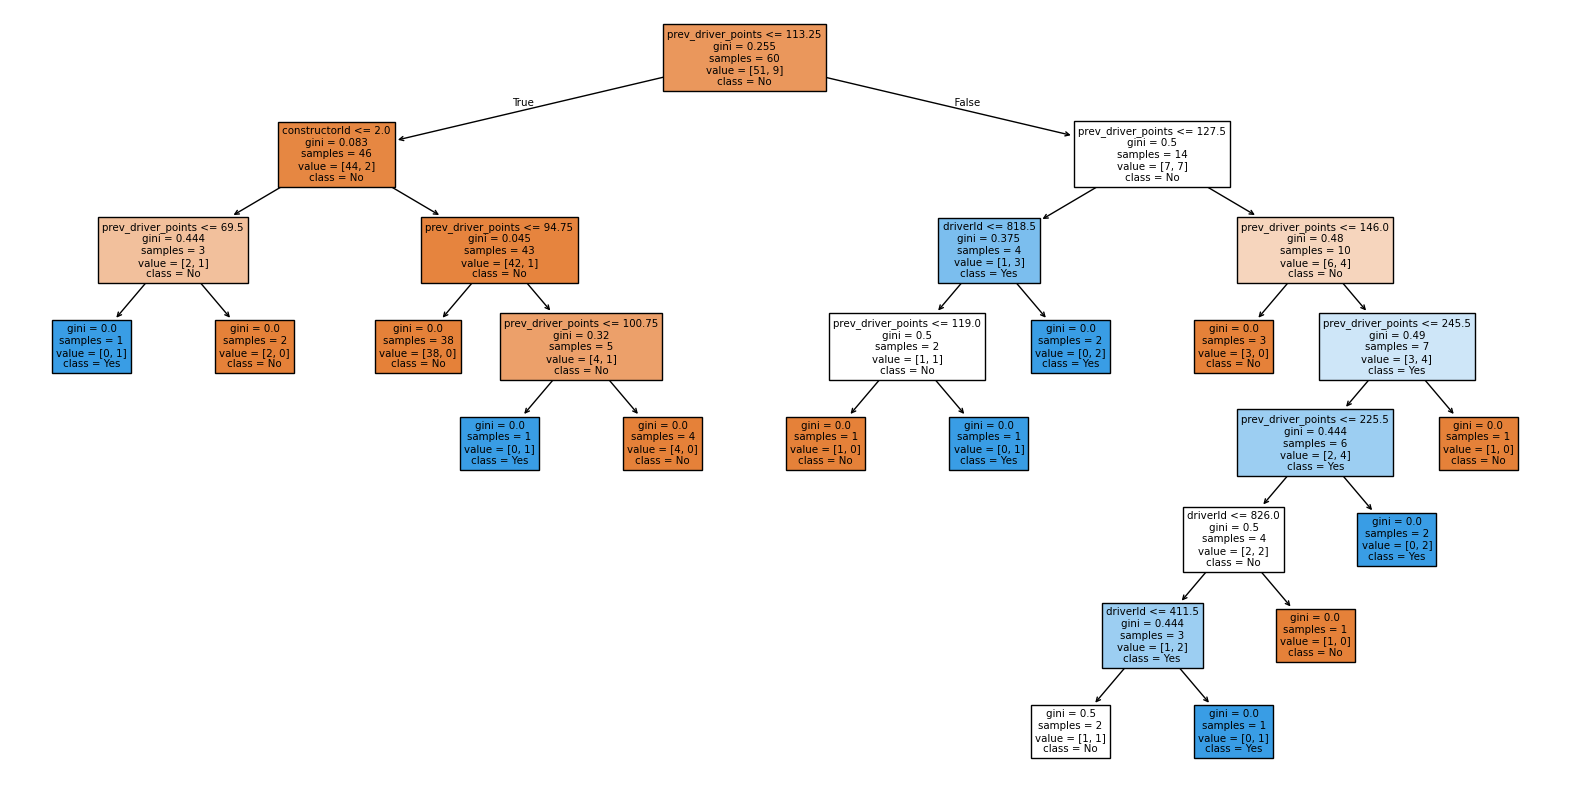

In [21]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'])
plt.show()